In [ ]:
pip install numpy scikit-learn matplotlib graphviz pydotplus


Fine Tree (max_depth=8):


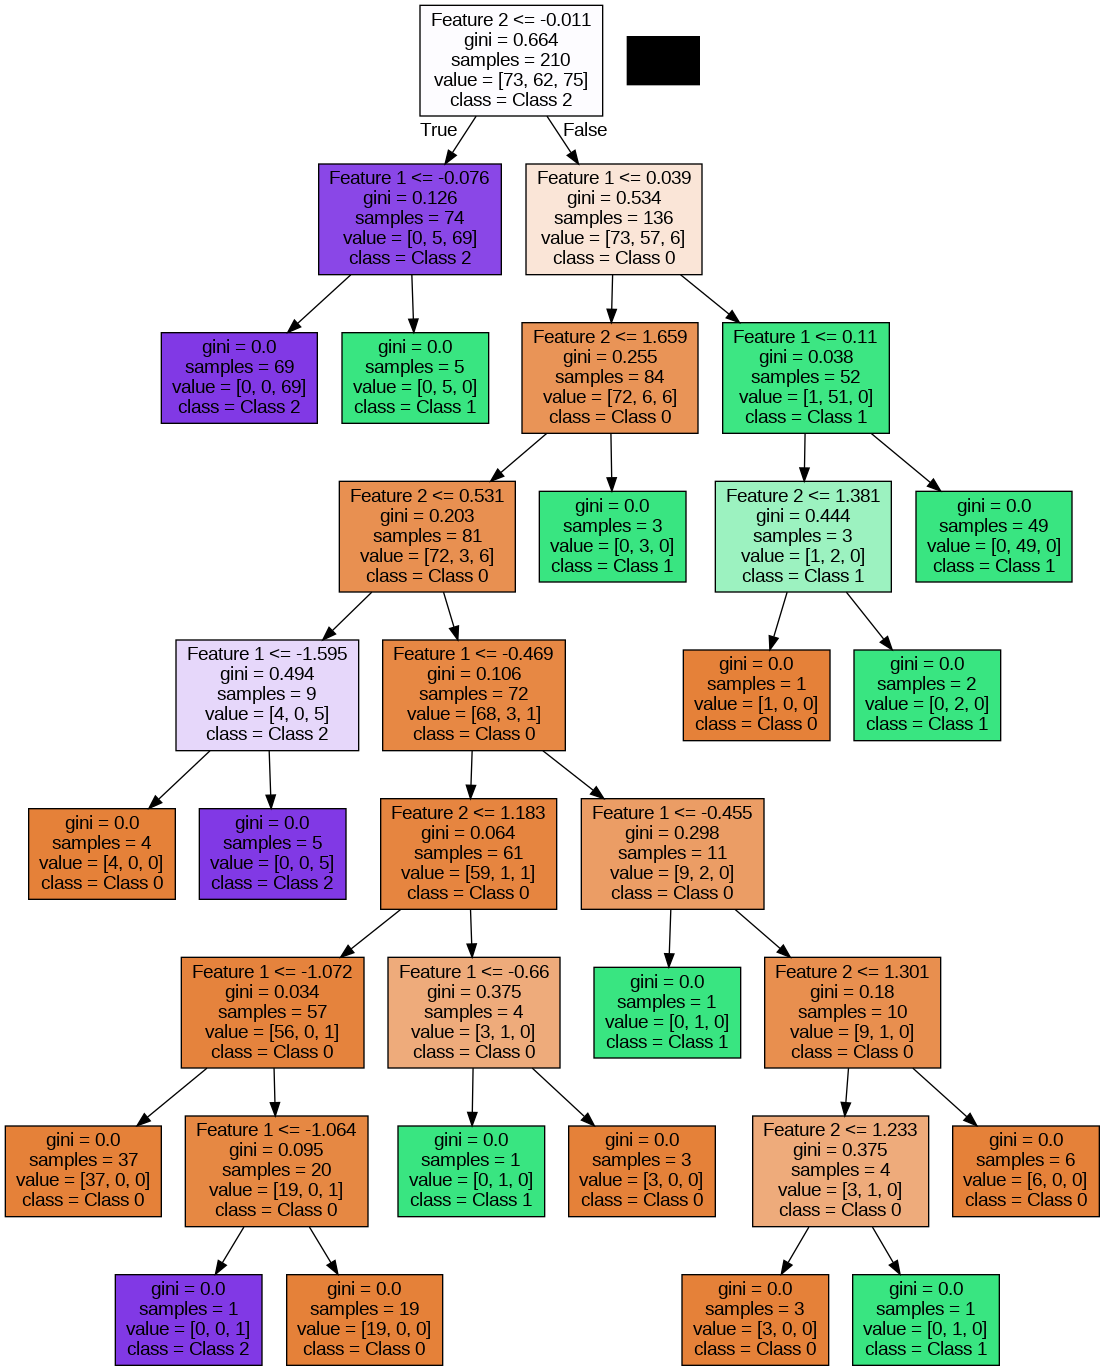

Medium Tree (max_depth=4):


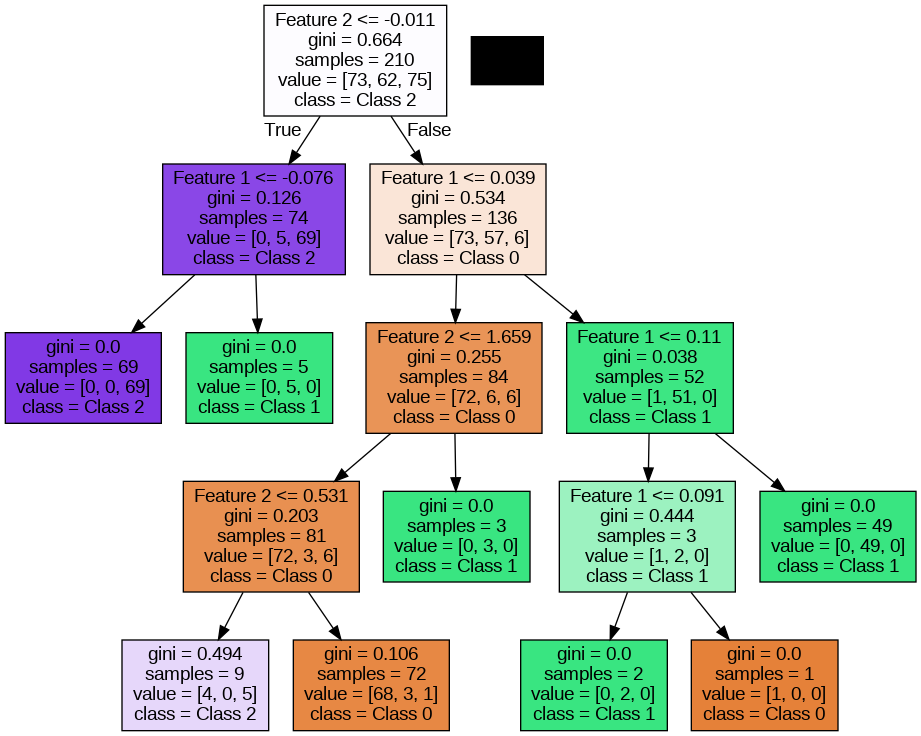

Coarse Tree (max_depth=2):


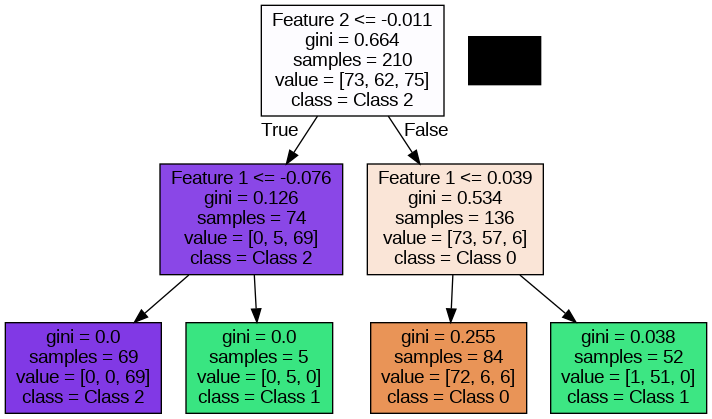

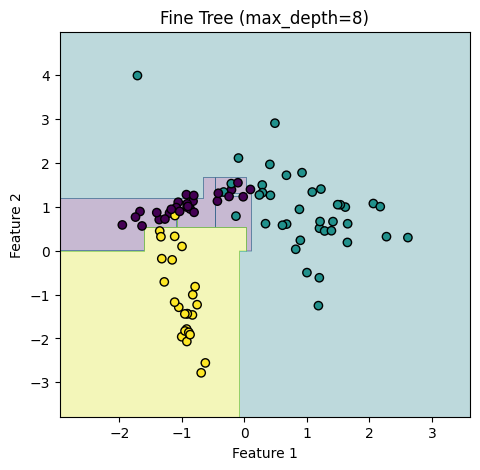

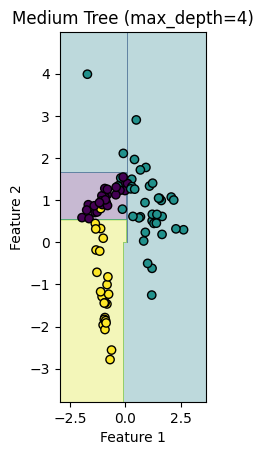

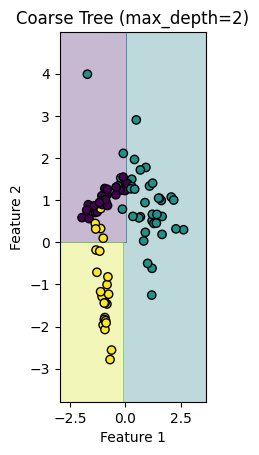

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from IPython.display import Image

# Generar un conjunto de datos sintético (ajustado)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear tres árboles de decisión con diferentes profundidades
fine_tree = DecisionTreeClassifier(max_depth=8, random_state=42)
medium_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
coarse_tree = DecisionTreeClassifier(max_depth=2, random_state=42)

# Entrenar los modelos
fine_tree.fit(X_train, y_train)
medium_tree.fit(X_train, y_train)
coarse_tree.fit(X_train, y_train)

# Función para mostrar el árbol de decisión con pydotplus
def visualize_tree(clf, feature_names, class_names):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=feature_names,
                                    class_names=class_names,
                                    filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    return Image(graph.create_png())

# Visualizar el árbol "Fine"
print("Fine Tree (max_depth=8):")
display(visualize_tree(fine_tree, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1", "Class 2"]))

# Visualizar el árbol "Medium"
print("Medium Tree (max_depth=4):")
display(visualize_tree(medium_tree, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1", "Class 2"]))

# Visualizar el árbol "Coarse"
print("Coarse Tree (max_depth=2):")
display(visualize_tree(coarse_tree, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1", "Class 2"]))

# Graficar la frontera de decisión para los tres árboles
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Mostrar la frontera de decisión para cada árbol
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(fine_tree, X_test, y_test, "Fine Tree (max_depth=8)")

plt.subplot(1, 3, 2)
plot_decision_boundary(medium_tree, X_test, y_test, "Medium Tree (max_depth=4)")

plt.subplot(1, 3, 3)
plot_decision_boundary(coarse_tree, X_test, y_test, "Coarse Tree (max_depth=2)")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        53
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        60
           5       0.67      0.91      0.77        66
           6       0.68      0.94      0.79        53
           7       0.80      0.71      0.75        55
           8       0.17      1.00      0.28        43
           9       1.00      0.27      0.43        59

    accuracy                           0.48       540
   macro avg       0.43      0.48      0.40       540
weighted avg       0.45      0.48      0.41       540



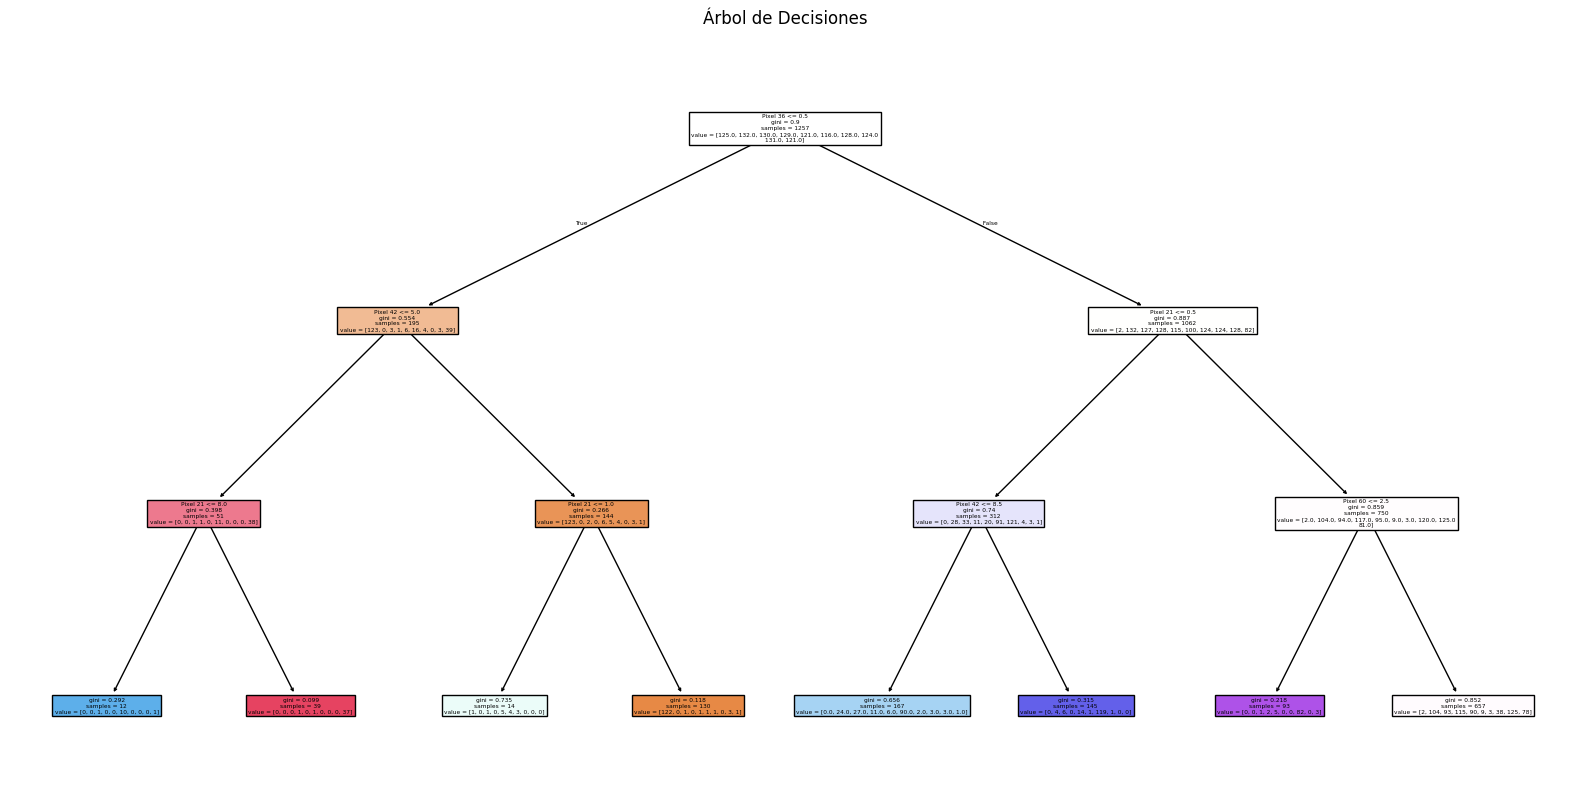

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Digits
digits = load_digits()
X = digits.data
y = digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador de árbol de decisiones
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Mostrar resultados
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Visualizar el árbol de decisiones
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=[f'Pixel {i}' for i in range(X.shape[1])])
plt.title('Árbol de Decisiones')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.96      0.50      0.66        50
           2       0.20      0.34      0.25        47
           3       0.32      0.61      0.42        54
           4       0.00      0.00      0.00        60
           5       0.00      0.00      0.00        66
           6       0.28      0.66      0.39        53
           7       0.26      0.96      0.41        55
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00        59

    accuracy                           0.30       540
   macro avg       0.20      0.31      0.21       540
weighted avg       0.19      0.30      0.20       540



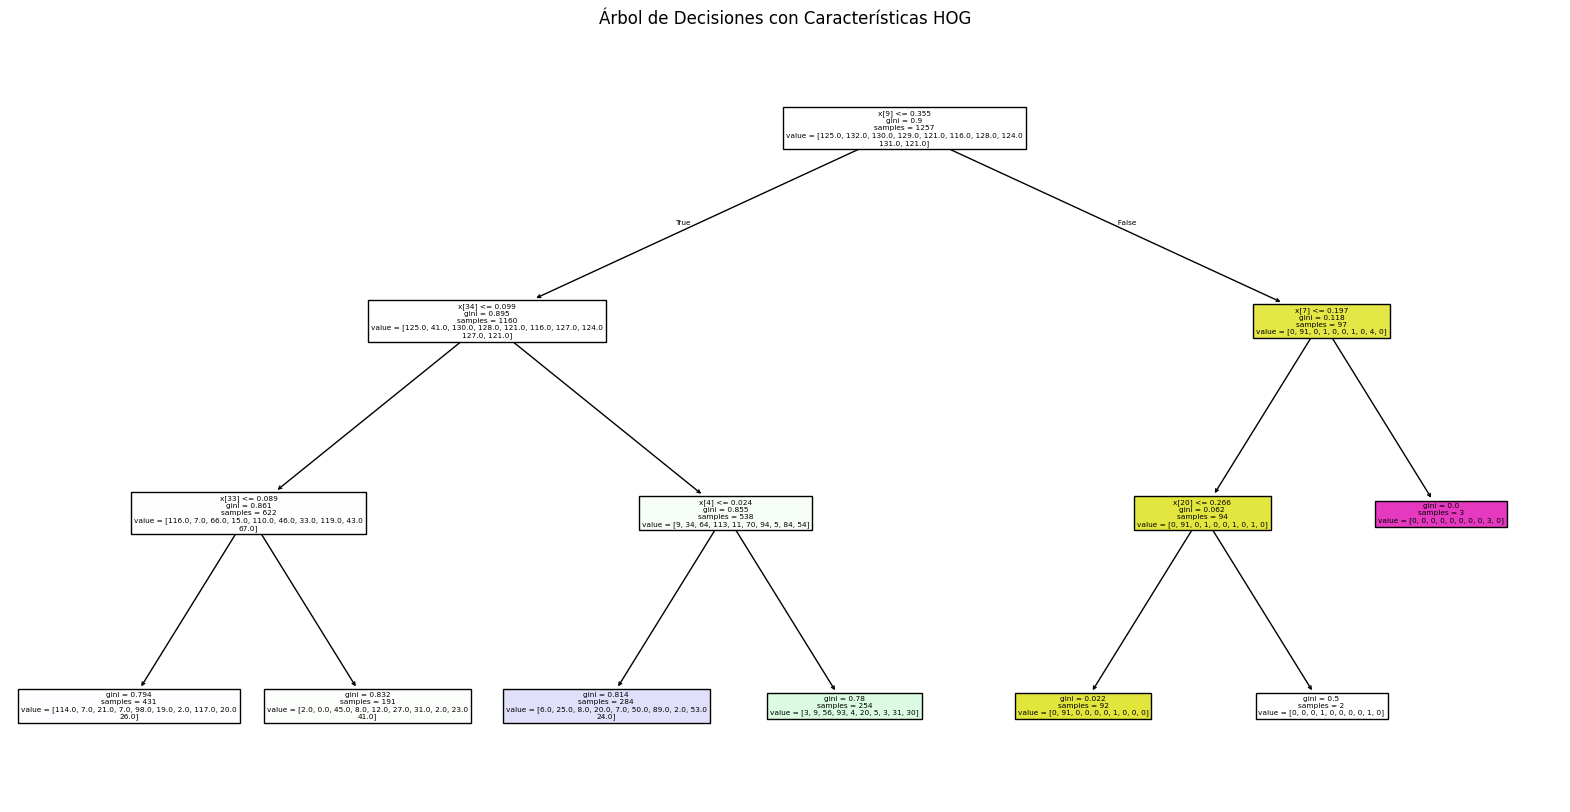

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from skimage.feature import hog
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Digits
digits = load_digits()
X = digits.images
y = digits.target

# Extraer características HOG de cada imagen
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Convertir la imagen a escala de grises si no lo está
        if len(image.shape) == 3:
            image = rgb2gray(image)
        # Ajustar los parámetros para imágenes pequeñas
        features, _ = hog(image, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

# Extraer características HOG para todo el conjunto de datos
X_hog = extract_hog_features(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador de árbol de decisiones
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Mostrar resultados
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Visualizar el árbol de decisiones
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True)
plt.title('Árbol de Decisiones con Características HOG')
plt.show()
